In [1]:
# import libraries
try: 
  # %tensorflow_version only exists in Colab.
    !pip install tf-nightly
except Exception:
    pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 344.1 MB 10 kB/s s eta 0:00:01     |██████████▎                     | 110.2 MB 57.1 MB/s eta 0:00:05     |███████████▋                    | 124.4 MB 57.1 MB/s eta 0:00:04     |██████████████████████████      | 279.5 MB 15.1 MB/s eta 0:00:05MB/s eta 0:00:04MB/s eta 0:00:04     |███████████████████████████▌    | 296.2 MB 15.1 MB/s eta 0:00:04| 302.8 MB 69.6 MB/s eta 0:00:01     |█████████████████████████████▋  | 318.8 MB 10.4 MB/s eta 0:00:03��███▉  | 320.4 MB 10.4 MB/s eta 0:00:03�█████████▏ | 323.9 MB 10.4 MB/s eta 0:00:02�██████████ | 333.8 MB 10.4 MB/s eta 0:00:01�██████████ | 334.1 MB 10.4 MB/s eta 0:00:01███████████████▋| 340.2 MB 98.4 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 18.1 MB/s eta 0:00:018.1 MB/s eta 0:00:01
  Attempting uninstall: tf-estimator-nightly
    Found existing inst

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, but you have tf-estimator-nightly 2.10.0.dev2022050308 which is incompatible.
     |████████████████████████████████| 4.2 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 48 kB 9.6 MB/s  eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=1550c29e28e1f0e1c4dc571342fce248def4bb61b8e8681461f261a54ef76ff2
  Stored in directory: /Users/cnieto/Library/Caches/pip/wheels/e1/e8/83/ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
2.10.0-dev20220503


In [4]:
train_file_path = '/Users/cnieto/Downloads/train_text.txt'
test_file_path = '/Users/cnieto/Downloads/test_text.txt'

In [5]:
# reading the downloaded files
import os
train_text = open(train_file_path,'rb').read().decode(encoding='utf-8')
test_text = open(test_file_path,'rb').read().decode(encoding='utf-8')

In [6]:
import re
whole = train_text + ' ' + test_text
unique_words = re.split(' |,| .|\n|ham\t|!',whole)
unique_words = sorted(set(unique_words))

In [7]:
# creating a word_index
word_index = {}
count = 1
for i in unique_words:
    word_index[i] = count
    count += 1

In [8]:
VOCAB_SIZE = len(unique_words)

In [9]:
# seggregate labels
train_labels = []
for i in train_text.split('\n'):
    if i.startswith('ham'):
        train_labels.append(0)
    else:
        train_labels.append(1)

In [10]:
#split each sms text
sms_train_list = re.split('ham\t|\n',train_text)
sms_test_list = re.split('ham\t|\n',test_text)

In [11]:
# deleting empty sms
sms_train_list = [i for i in sms_train_list if len(i) > 0]
sms_test_list = [i for i in sms_test_list if len(i) > 0]

In [12]:
train_labels.pop(-1)

1

In [13]:
MAXLEN = 200
BATCH_SIZE = 64

In [14]:
#encoder for text
#%tensorflow_version 2.x
from keras.preprocessing import sequence
from tensorflow.compat.v1.keras.preprocessing.sequence import pad_sequences

def encode_text(text):
    tokens = keras.preprocessing.text.text_to_word_sequence(text)
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]
    return pad_sequences([tokens],MAXLEN)[0]

In [15]:
encode_text(sms_train_list[2])

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [16]:
sms_train_list[2]

'now u sound like manky scouse boy steve,like! i is travelling on da bus home.wot has u inmind 4 recreation dis eve?'

In [17]:
# encoding whole train and test and applying padding all at once
train_data = list(map(encode_text,sms_train_list))
test_data = list(map(encode_text,sms_test_list))

In [33]:
## bulding model 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          404032    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 412,385
Trainable params: 412,385
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compiling and training
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

hist = model.fit(np.asarray(train_data), np.asarray(train_labels),epochs=15,validation_split=0.2)

Epoch 1/15
105/105 [==============================] - 12s 87ms/step - loss: 0.2503 - acc: 0.9061 - val_loss: 0.1302 - val_acc: 0.9833
Epoch 2/15
105/105 [==============================] - 8s 80ms/step - loss: 0.0745 - acc: 0.9838 - val_loss: 0.0561 - val_acc: 0.9892
Epoch 3/15
105/105 [==============================] - 8s 79ms/step - loss: 0.0347 - acc: 0.9928 - val_loss: 0.0416 - val_acc: 0.9892
Epoch 4/15
105/105 [==============================] - 8s 76ms/step - loss: 0.0173 - acc: 0.9958 - val_loss: 0.0310 - val_acc: 0.9928
Epoch 5/15
105/105 [==============================] - 9s 81ms/step - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0400 - val_acc: 0.9916
Epoch 6/15
105/105 [==============================] - 9s 87ms/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.0353 - val_acc: 0.9928
Epoch 7/15
105/105 [==============================] - 9s 82ms/step - loss: 8.7871e-04 - acc: 0.9997 - val_loss: 0.0351 - val_acc: 0.9916
Epoch 8/15
105/105 [==============================] - 11s 103ms/

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

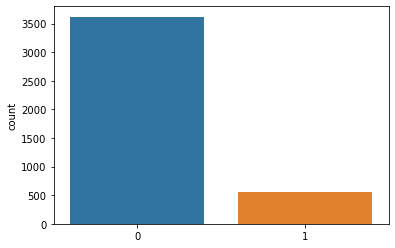

In [36]:
import seaborn as sns

sns.countplot(train_labels)

In [37]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    encoded_text = encode_text(pred_text)
    pred = np.zeros((1,200)) # maximum of words we want in each review
    pred[0] = encoded_text
    result = model.predict(pred)
    if result < 0.4: # due to unbalancement on target label, we have to give the model more tolerance
        result_text = 'ham'
    else:
        result_text = 'spam'

    return [result[0][0],result_text]
pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 1s 554ms/step
[1.8491235e-07, 'ham']


## Testing

In [40]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    
    test_messages = ["how are you doing today",
                     "i dont want to go. can we try it a different day? available sat",
                     "our new mobile video service is live. just install on your phone to start watching.",
                     "you have won £1000 cash! call to claim your prize.",
                     "i'll bring it tomorrow. don't forget the milk.",
                     "wow, is your arm alright. that happened to me one time too"
                    ]

    test_answers = ["ham", "ham", "spam", "spam", "ham", "ham"]
    passed = True

    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
        print(prediction)
        if prediction[1] != ans:
            passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")
test_predictions()

1/1 [==============================] - 0s 34ms/step
[1.8491235e-07, 'ham']
1/1 [==============================] - 0s 31ms/step
[1.8486263e-07, 'ham']
1/1 [==============================] - 0s 32ms/step
[0.99996406, 'spam']
1/1 [==============================] - 0s 34ms/step
[0.9999525, 'spam']
1/1 [==============================] - 0s 36ms/step
[2.7117727e-07, 'ham']
1/1 [==============================] - 0s 32ms/step
[1.0927022e-07, 'ham']
You passed the challenge. Great job!
